In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 50)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('../../data/train_models_37_60_ltv30_from_2017-06-18_to_2018-06-18.csv.gz')

In [65]:
df.columns

Index(['idApp', 'idProfile', 'idfa', 'idfv', 'gaid', 'android_id', 'imei',
       'waid', 'idDevice', 'dt', 'ltvDay1', 'ltvDay2', 'ltvDay3', 'ltvDay4',
       'ltvDay5', 'ltvDay6', 'ltvDay7', 'ltvDay8', 'ltvDay30', 'ltvDay60',
       'ltvDay90'],
      dtype='object')

In [3]:
df.head()

,idApp,idProfile,idfa,idfv,gaid,android_id,imei,waid,idDevice,dt,ltvDay1,ltvDay2,ltvDay3,ltvDay4,ltvDay5,ltvDay6,ltvDay7,ltvDay8,ltvDay30,ltvDay60,ltvDay90
0,279,921502265,00000000-0000-0000-0000-000000000000,00000000-0000-0000-0000-000000000000,522c7ec0-ea35-4610-84b6-21833f6773e0,9B74D5FF330E3669,352691083826594,0,550271531,2018-02-18,0,0,0,2190000,2190000,2190000,5780000,5780000,5780000,5780000,5780000
1,279,987232492,00000000-0000-0000-0000-000000000000,00000000-0000-0000-0000-000000000000,4f7b775d-ed1c-4890-8f7a-142a338ec1cd,B5119F4EA129AA66,13047384755529164800,0,253693815,2018-04-20,0,0,0,0,0,0,0,0,0,875276,875276
2,5620,788603874,00000000-0000-0000-0000-000000000000,00000000-0000-0000-0000-000000000000,00000000-0000-0000-0000-000000000000,0000000000000000,0,0,209555674,2017-09-28,0,0,0,0,0,0,0,0,0,2980000,2980000
3,279,853565500,00000000-0000-0000-0000-000000000000,00000000-0000-0000-0000-000000000000,316df861-9c5a-454d-baf8-24c43de4a67f,43F46756E53CBDFF,0,0,542244336,2017-12-11,0,0,0,0,0,0,0,3652414,12123190,30737676,33594119
4,5620,909916243,b108e064-97d6-46f8-8374-2de57327a400,1540dbd8-f8c9-4130-b8e8-8737affe7d8b,00000000-0000-0000-0000-000000000000,0000000000000000,0,0,501760121,2018-02-06,1490000,1490000,1490000,1490000,1490000,1490000,1490000,1490000,1490000,1490000,1490000


In [4]:
df.shape

(3324150, 21)

In [5]:
df.idApp.nunique()

130

In [6]:
df.columns

Index(['idApp', 'idProfile', 'idfa', 'idfv', 'gaid', 'android_id', 'imei',
       'waid', 'idDevice', 'dt', 'ltvDay1', 'ltvDay2', 'ltvDay3', 'ltvDay4',
       'ltvDay5', 'ltvDay6', 'ltvDay7', 'ltvDay8', 'ltvDay30', 'ltvDay60',
       'ltvDay90'],
      dtype='object')

In [7]:
df.idApp.value_counts().head(15)

5620    1077387
279      532735
5619     484202
278      282209
313      221160
314      166953
95       129041
5645     115304
5644      53333
156       48223
59        36146
152       27755
73        27033
157       14035
160       12427
Name: idApp, dtype: int64

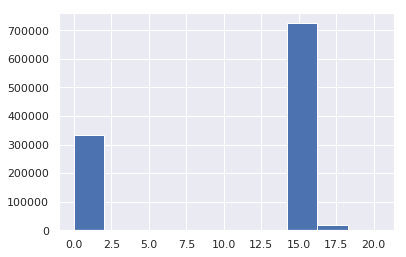

In [8]:
df.loc[df['idApp'] == 5620, 'ltvDay30'].apply(np.log1p).hist();

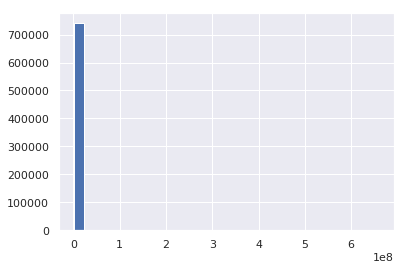

In [9]:
df.loc[(df['idApp'] == 5620) &
       (df['ltvDay30'] > 0), 'ltvDay30'].hist(bins=30);

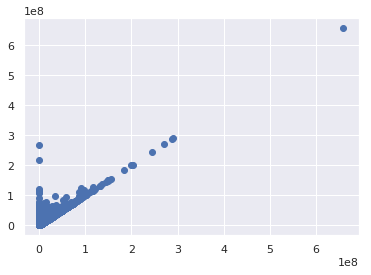

In [10]:
plt.scatter(df.loc[df['idApp'] == 5620, 'ltvDay8'],
           df.loc[df['idApp'] == 5620, 'ltvDay30']);

In [11]:
df.dt.min(), df.dt.max()

('2017-06-18', '2018-06-18')

In [12]:
ID_APP = 160

In [13]:
train_df = df[(df.idApp == ID_APP) & (df.dt >= '2018-01-01')
             &  (df.dt <=  '2018-02-28')]
valid_df = df[(df.idApp == ID_APP) & (df.dt >= '2018-04-01')
             &  (df.dt <=  '2018-04-30')]

In [14]:
train_df.shape, valid_df.shape

((1880, 21), (789, 21))

In [15]:
features = ['ltvDay%d' % i for i in range(1, 9)]

In [16]:
features

['ltvDay1',
 'ltvDay2',
 'ltvDay3',
 'ltvDay4',
 'ltvDay5',
 'ltvDay6',
 'ltvDay7',
 'ltvDay8']

In [17]:
X_train, X_valid = train_df[features], valid_df[features]
y_train, y_valid = train_df.ltvDay30, valid_df.ltvDay30

In [18]:
from sklearn.linear_model import Ridge

In [36]:
ridge = Ridge(random_state=17, normalize=True)

In [37]:
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=17, solver='auto', tol=0.001)

In [38]:
pred = ridge.predict(X_valid)

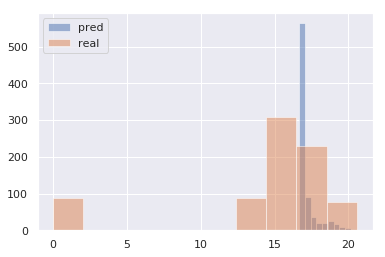

In [39]:
plt.hist(np.log1p(pred), alpha=0.5, label='pred')
plt.hist(np.log1p(y_valid), alpha=0.5, label='real')
plt.legend();

In [40]:
pred.sum(), y_valid.sum()

(32994064281.883736, 31342917428)

In [41]:
error = pred.sum() / y_valid.sum() - 1

In [42]:
round(100 * error, 2)

5.27

In [43]:
ridge.coef_, ridge.intercept_

(array([0.09136699, 0.1069909 , 0.11506607, 0.11947837, 0.12411832,
        0.12769609, 0.13527976, 0.14695451]), 17510528.61508203)

In [44]:
df.dt.head()

0    2018-02-18
1    2018-04-20
2    2017-09-28
3    2017-12-11
4    2018-02-06
Name: dt, dtype: object

In [45]:
df.dt = pd.to_datetime(df.dt)

In [46]:
df.dt.head()

0   2018-02-18
1   2018-04-20
2   2017-09-28
3   2017-12-11
4   2018-02-06
Name: dt, dtype: datetime64[ns]

In [47]:
from datetime import timedelta, datetime

In [48]:
df.dt.loc[0]

Timestamp('2018-02-18 00:00:00')

In [49]:
df.dt.loc[0] + timedelta(days=1)

Timestamp('2018-02-19 00:00:00')

In [50]:
step = 30

In [51]:
MIN_TRAIN_SIZE = 1000

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
train_start = df.dt.min()
train_end = train_start + timedelta(days=60)

test_start = train_start + timedelta(days=90)
test_end = train_start + timedelta(days=120)

In [54]:
errors = {}

while test_end < df.dt.max():
    
    train_df = df[(df.dt >= train_start) & (df.dt < train_end)]
    valid_df = df[(df.dt >= test_start) & (df.dt < test_end)]
    
    
    for id_app, sub_df in train_df.groupby('idApp'):
        
        X, y = sub_df[features], sub_df.ltvDay30
        X_valid = valid_df.loc[valid_df['idApp'] == id_app, features]
        y_valid = valid_df.loc[valid_df['idApp'] == id_app, 'ltvDay30']
        
        if X.shape[0] >= MIN_TRAIN_SIZE and X_valid.shape[0] > 0:
            ridge.fit(X, y)
            pred = ridge.predict(X_valid)
            
            error = pred.sum() / y_valid.sum() - 1
        
            
            if id_app in errors:
                if errors[id_app]:
                    errors[id_app].append(error)
                else:
                    errors[id_app] = [error]
            else:
                errors[id_app] = [error]
            
    
    train_start += timedelta(days=step)
    train_end += timedelta(days=step)
    test_start += timedelta(days=step)
    test_end += timedelta(days=step)

In [55]:
top5_apps = df.idApp.value_counts().head(5).index

In [56]:
top5_apps

Int64Index([5620, 279, 5619, 278, 313], dtype='int64')

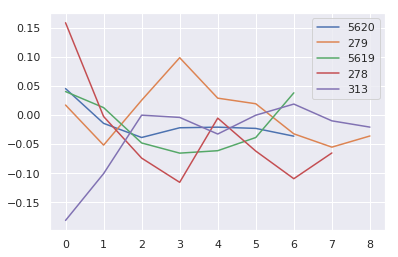

In [57]:
for id_app in top5_apps:
    plt.plot(list(range(len(errors[id_app]))), errors[id_app], label=id_app);
plt.legend();

In [58]:
five_apps = df.idApp.value_counts().iloc[5:10].index

In [59]:
five_apps

Int64Index([314, 95, 5645, 5644, 156], dtype='int64')

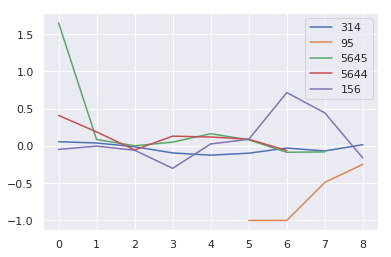

In [60]:
for id_app in five_apps:
    plt.plot(list(range(len(errors[id_app]))), errors[id_app], label=id_app);
plt.legend();

In [61]:
five_apps = df.idApp.value_counts().iloc[10:15].index

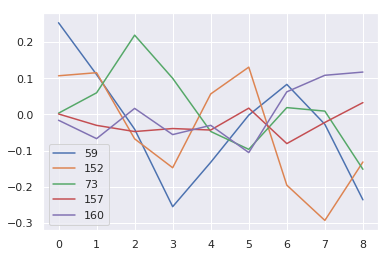

In [62]:
for id_app in five_apps:
    plt.plot(list(range(len(errors[id_app]))), errors[id_app], label=id_app);
plt.legend();

In [63]:
five_apps = df.idApp.value_counts().iloc[15:20].index

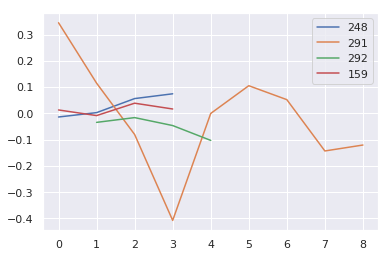

In [64]:
for id_app in five_apps:
    if id_app in errors:
        plt.plot(list(range(len(errors[id_app]))), errors[id_app], label=id_app);
plt.legend();